In [22]:
PATH = "stage1_train_labels.csv"

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as im
from opencv as ocv

In [27]:
df = pd.read_csv(PATH)
df

ImageId  \
0      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
1      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
2      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
3      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
4      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
5      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
6      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
7      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
8      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
9      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
10     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
11     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
12     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
13     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
14     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
15     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
16     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
17     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
18     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
19     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
20     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
21     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
22     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
23     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
24     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
25     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
26     00071198d059ba7f5914a526d124d28e6d010c92466da2...   
27     003cee89357d9fe13516167fd67b609a164651b2193458...   
28     003cee89357d9fe13516167fd67b609a164651b2193458...   
29     003cee89357d9fe13516167fd67b609a164651b2193458...   
...                                                  ...   
29431  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29432  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29433  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29434  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29435  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29436  ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...   
29437  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29438  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29439  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29440  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29441  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29442  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29443  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29444  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29445  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29446  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29447  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29448  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29449  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29450  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29451  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29452  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29453  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29454  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29455  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29456  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29457  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29458  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29459  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29460  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   

                                           EncodedPixels  
0      6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...  
1      36269 7 36523 11 36778 13 37033 15 37288 17 37...  
2      19919 6 20174 8 20429 10 20685 11 20941 12 211...  
3      18671 6 18926 8 19181 9 19436 10 19691 11 1994...  
4                40158 3 40413 5 

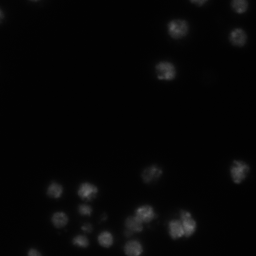

In [44]:
img = "00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png"
im.open(img)

In [17]:
# NAVIGATOR
% cd -
% pwd

/Users/aakashsudhakar/Desktop/dev/data_projects/DS-1-Data-Analysis


'/Users/aakashsudhakar/Desktop/dev/data_projects/DS-1-Data-Analysis'

In [18]:
% ls

00__Test_Installation.ipynb
01__Descriptive Statistics.ipynb
02__Data_Visualization.ipynb
03.5__Converting_Z-scores_to_Probability.ipynb
03__Normal_Distribution_and_CLT.ipynb*
Installation_Instructions.md
Kaggle DSB 2018 Exploratory Sandbox.ipynb
README.md
Titanic Data Exploration.ipynb
Untitled.ipynb
datasets/
img/


In [19]:
% mv ./Kaggle\ DSB\ 2018\ Exploratory\ Sandbox.ipynb ../kaggle_projects/2018-data-science-bowl/

In [20]:
% ls

00__Test_Installation.ipynb
01__Descriptive Statistics.ipynb
02__Data_Visualization.ipynb
03.5__Converting_Z-scores_to_Probability.ipynb
03__Normal_Distribution_and_CLT.ipynb*
Installation_Instructions.md
README.md
Titanic Data Exploration.ipynb
Untitled.ipynb
datasets/
img/
